In [1]:
%cd ..
%load_ext autoreload
%autoreload 2

/home/dongmin/userdata/jeongganbo-omr


In [2]:
from pathlib import Path

import cv2
import matplotlib.pyplot as plt

import torch
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import transforms

from exp_utils.inferencer import Inferencer

/home/dongmin/.local/share/virtualenvs/jeongganbo-omr-QQMBMPoZ/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# load model with 0.89 in "exact_all"
exp_dir = '2024-05-04/11-10-10'
tokenizer_fn = 'transformer_4M_2_full_aux_tokenizer.txt'
weight_fn = 'transformer_4M_2_full_aux_HL_exact_all_best.pt'

exp_base = Path.home() / Path('userdata/jeongganbo-omr/outputs')

exp_path = exp_base / exp_dir
model_path = exp_path / 'model'
config_path = exp_path / '.hydra' / 'config.yaml'

inferencer = Inferencer(
  vocab_txt_fn=(model_path / tokenizer_fn), 
  model_config_path=config_path,
  model_weights=(model_path / weight_fn),
  device='cuda'
)

('배남:2 배임:5 배남_니나:8', None)

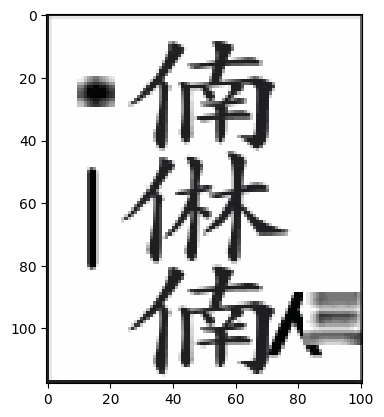

In [4]:
tgt_fn = 'jeongganbo-png/splited-pngs/여민락_piri_859.png'

plt.imshow(cv2.imread(tgt_fn))

inferencer('jeongganbo-png/splited-pngs/여민락_piri_859.png')

In [5]:
tgt_fn_ls = [
  'jeongganbo-png/splited-pngs/여민락_piri_859.png',
  'jeongganbo-png/splited-pngs/여민락_piri_860.png',
  'jeongganbo-png/splited-pngs/여민락_piri_861.png'
]

tgt_img_ls = [ cv2.imread(tgt_fn) for tgt_fn in tgt_fn_ls ]

pred_ls = inferencer(tgt_img_ls)

pred_ls

(['배남:2 배임:5 배남_니나:8', '태:5', '-:2 -:5 황:8'],
 tensor([0.5145, 0.9999, 0.9975], device='cuda:0'))

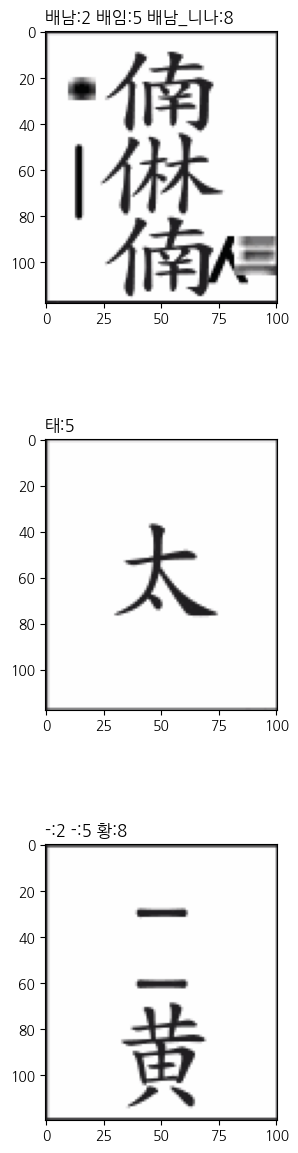

In [6]:
plt.rcParams.update({'font.family': 'NanumGothic'})
plt.figure(figsize=(3, 15))
num_row = 3
num_col = 1

idx = 1

for img, pred in zip(tgt_img_ls, pred_ls[0]):
  plt.subplot(num_row, num_col, idx)
  plt.imshow(img)
  plt.title(pred, loc='left')
  idx+=1

In [29]:
def sort_key_jng_img(x):
  x = x.stem
  title, inst, idx = x.split('_')
  idx = int(idx)
  
  return (title, inst, idx)

jng_img_paths = Path('jeongganbo-png/splited-pngs/').glob('*.png')
jng_img_paths = [ i_p for i_p in jng_img_paths if 'yml_' not in str(i_p) ]
jng_img_paths = sorted( jng_img_paths, key=sort_key_jng_img )

In [35]:
data = jng_img_paths

print(len(data))

batch_size = 100
num_batch = round( len(data) / batch_size )

if len(data) % batch_size > 0:
  num_batch += 1

print(num_batch)

total = []

# for i in range(num_batch):
for i in range(2):
  batch_path = data[i * batch_size : (i+1) * batch_size]
  batch_img = [ cv2.imread(i_p) for i_p in batch_path ]
  
  pred_ls, _ = inferencer(batch_img)
  
  batch_path = [ i_p.name for i_p in batch_path ]
  total += list(zip( batch_path, pred_ls ))

141738
1418
